<a href="https://colab.research.google.com/github/Raghavjajooc123/MajorProject/blob/main/rough/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing the data

In [4]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

Converting the image into grayscale

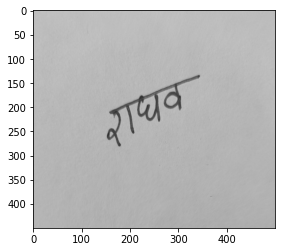

(1147, 1600)

In [5]:
# img = Image.open('/content/ezgif.com-gif-maker(5).jpg')
# imgGray = img.convert('L')

# img = cv2.imread('/content/WhatsApp Image 2022-04-30 at 5.06.34 PM (2).jpeg')
img = cv2.imread('/content/WhatsApp Image 2022-05-02 at 6.58.03 PM.jpeg')
# img = cv2.imread('/content/ezgif.com-gif-maker(5).jpg')
imgGray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# imgGray.save('/content/ezgif.com-gif-maker-gray.jpg')
# img = cv2.imread('/content/ezgif.com-gif-maker-gray.jpg')

im_resized = cv2.resize(imgGray, (500, 450), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()
imgGray.shape

Binarization

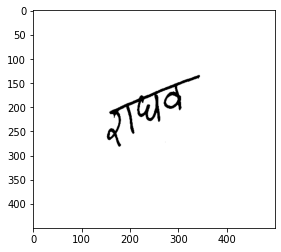

Obtained threshold:  134.0


(1147, 1600)

In [6]:
# _, bw = cv2.threshold(imgGray, 127, 255, cv2.THRESH_BINARY)
# bw = gray.point(lambda x: 0 if x<97 else 255, '1')
# bw.save("/content/ezgif.com-gif-maker-bw.jpg")
# img = cv2.imread('/content/ezgif.com-gif-maker-bw.jpg')
otsu_threshold, image_result = cv2.threshold(
    imgGray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)

im_resized = cv2.resize(image_result, (500, 450), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()
print("Obtained threshold: ", otsu_threshold)

image_result.shape

Smoothing and Noise Removal

Filtering for noise removal

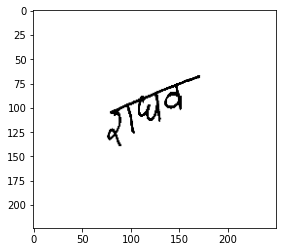

(1147, 1600)

In [7]:
median = cv2.medianBlur(image_result,5)
cv2.imwrite('/content/ezgif.com-gif-maker-median.jpg',median)

im_resized = cv2.resize(median, (250, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

median.shape

Calculating projections

In [8]:
# median[median == 0] = 1
# median[median == 255] = 0

In [9]:
# horizontal_projection = np.sum(median, axis=1);
# print(horizontal_projection);

In [10]:
# (height, width) = median.shape
# print('width : ', width)
# print('height : ', height)
# blankImage = np.zeros((height, width), np.uint8)

In [11]:
# for row in range(height):
#     cv2.line(blankImage, (0,row), (int(horizontal_projection[row]*width/height),row), (255,255,255), 1)

# im_resized = cv2.resize(blankImage, (250, 224), interpolation=cv2.INTER_LINEAR)
# plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
# plt.show()

Function to Calculate skew angle of an image

In [12]:
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    newImage = cv2.bitwise_not(newImage)
    # gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    # blur = cv2.GaussianBlur(gray, (9, 9), 0)
    # _,thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY_INV)

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(newImage, kernel, iterations=5)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

Rerotating out image

In [13]:
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

Calling out the functions

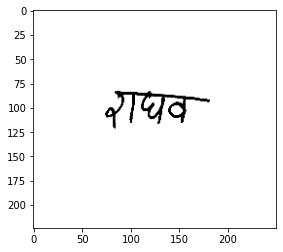

In [14]:
fixed = deskew(median)
cv2.imwrite('/content/ezgif.com-gif-maker-fixed.jpg', fixed)

im_resized = cv2.resize(fixed, (250, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

Preprocessing is completed ;-)

Begins Segmentation hehehe